In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
filename = 'tips.csv'

myframe = pd.read_csv(filename, encoding='utf-8', index_col=0)

In [6]:
myframe

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:

DINNER, LUNCH = 'Dinner', 'Lunch'

frame01 = myframe.loc[myframe['time'] == DINNER, 'total_bill']
frame01.index.name = DINNER

frame02 = myframe.loc[myframe['time'] == LUNCH, 'total_bill']
frame02.index.name = LUNCH

In [8]:
chartdata = [np.array(frame01), np.array(frame02)]
print('chartdata')
print(chartdata)

chartdata
[array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
       18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
       26.86, 25.28, 14.73, 10.51, 17.92, 28.97, 22.49,  5.75, 16.32,
       22.75, 40.17, 27.28, 12.03, 21.01, 12.46, 11.35, 15.38, 44.3 ,
       22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.  ,  7.25,
       38.07, 23.95, 25.71, 17.31, 29.93, 14.07, 13.13, 17.26, 24.55,
       19.77, 29.85, 48.17, 25.  , 13.39, 16.49, 21.5 , 12.66, 16.21,
       13.81, 17.51, 24.52, 20.76, 31.71, 10.59, 10.63, 50.81, 15.81,
        7

In [9]:
plt.rc('font', family='AppleGothic')

boxPlotExam_01.png 파일이 저장되었습니다.
finished


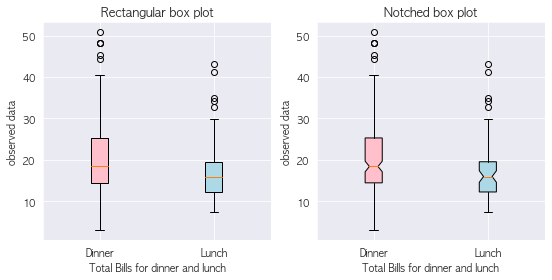

In [10]:
xtick_label = [DINNER, LUNCH] # x 축을 위한 레이블

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(chartdata,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=xtick_label)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(chartdata,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=xtick_label)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

colors = ['pink', 'lightblue'] # fill with colors
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Total Bills for dinner and lunch')
    ax.set_ylabel('observed data')

cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'boxPlotExam'

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

print('finished')

In [7]:
CHART_NAME = 'histogramExam'
filename = 'tips.csv'
num_bins = 30

<class 'pandas.core.series.Series'>
mu : 19.785942622950824
sigma : 8.902411954856856
histogramExam_02.png 파일이 저장되었습니다.


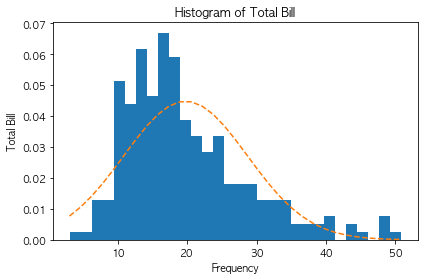

In [8]:
tips = pd.read_csv(filename, encoding='utf-8')

fig, ax = plt.subplots()

x = tips['total_bill'] # Series
print(type(x))

n, bins, patches = ax.hist(x, num_bins, density=True)

ax.set_title('Histogram of Total Bill')
ax.set_xlabel('Frequency')
ax.set_ylabel('Total Bill')

import numpy as np

mu = x.mean()  # 평균
print('mu :', mu)

sigma = x.std() # 표준 편차
print('sigma :', sigma)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

histogramExam_03.png 파일이 저장되었습니다.


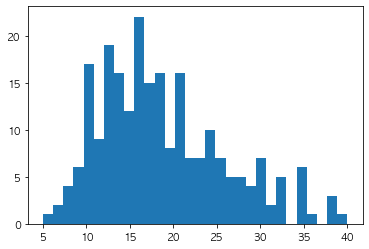

In [9]:
# 만약 최소값/최대값을 바꾸거나 계급 구간의 개수를 늘리고 싶다면 range와 bins를 통해 직접 설정할 수 있다.
fig, ax = plt.subplots()
plt.hist(x, range=(5, 40), bins=num_bins)

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')